Missing Values:
 PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            1
Fare           0
dtype: int64

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  8 non-null      int64  
 1   Survived     8 non-null      int64  
 2   Pclass       8 non-null      int64  
 3   Sex          8 non-null      object 
 4   Age          8 non-null      float64
 5   Fare         8 non-null      float64
 6   Sex_encoded  8 non-null      int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 580.0+ bytes
None

Statistical Summary:
        PassengerId  Survived    Pclass        Age       Fare  Sex_encoded
count      8.00000  8.000000  8.000000   8.000000   8.000000     8.000000
mean       4.50000  0.500000  2.125000  30.875000  28.623750     0.500000
std        2.44949  0.534522  0.991031  14.989878  25.997152 

<ipython-input-1-1450283578>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


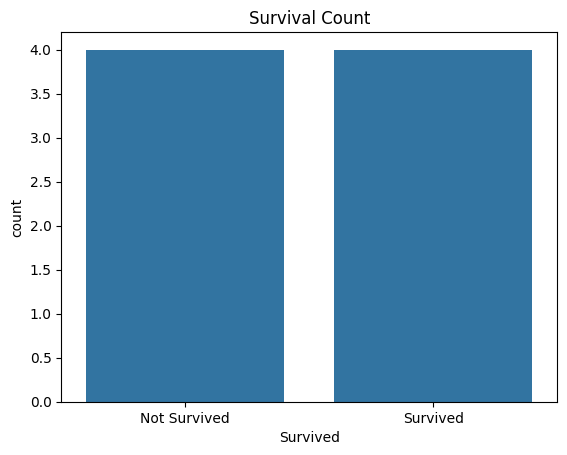

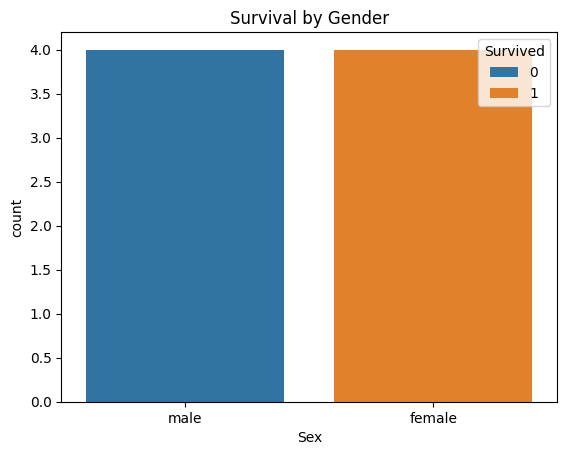

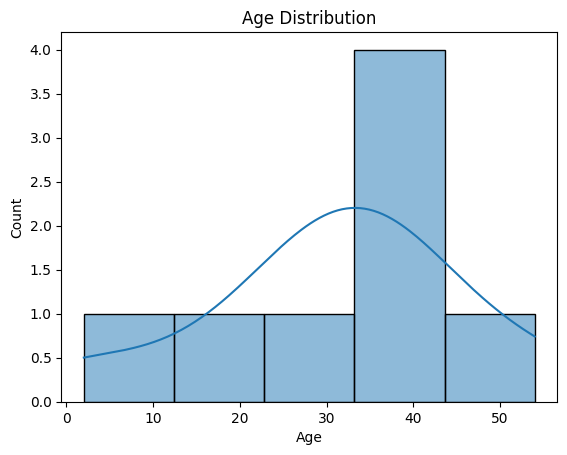

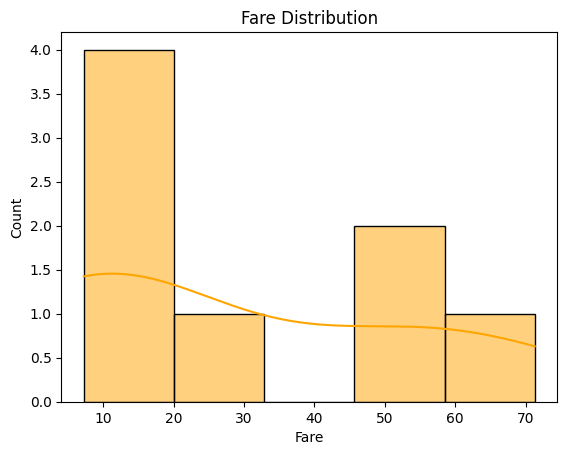

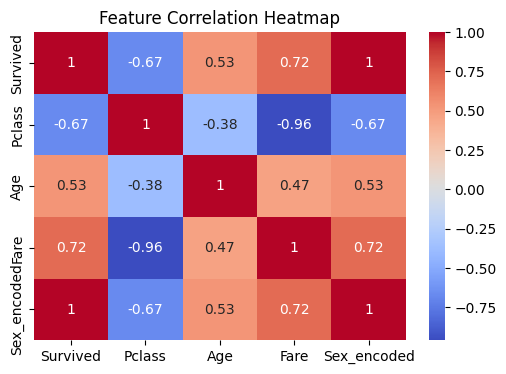

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Titanic-style dataset (no CSV needed)
data = {
    'PassengerId': [1, 2, 3, 4, 5, 6, 7, 8],
    'Survived':    [0, 1, 1, 1, 0, 0, 1, 0],
    'Pclass':      [3, 1, 3, 1, 3, 3, 1, 2],
    'Sex':         ['male', 'female', 'female', 'female', 'male', 'male', 'female', 'male'],
    'Age':         [22, 38, 26, 35, 35, None, 54, 2],
    'Fare':        [7.25, 71.28, 7.92, 53.10, 8.05, 8.46, 51.86, 21.07],
}

# Create DataFrame
df = pd.DataFrame(data)

# --- 1. Data Cleaning ---
# Check missing values
print("Missing Values:\n", df.isnull().sum())

# Fill missing 'Age' with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Encode 'Sex' for numerical analysis
df['Sex_encoded'] = df['Sex'].map({'male': 0, 'female': 1})

# --- 2. Basic Info ---
print("\nData Info:")
print(df.info())

# --- 3. Statistical Summary ---
print("\nStatistical Summary:\n", df.describe())

# --- 4. EDA Visualizations ---

# Plot: Survival Count
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

# Plot: Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

# Plot: Age Distribution
sns.histplot(df['Age'], bins=5, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

# Plot: Fare Distribution
sns.histplot(df['Fare'], bins=5, kde=True, color='orange')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.show()

# Plot: Correlation Heatmap (only numeric features)
plt.figure(figsize=(6, 4))
numeric_df = df[['Survived', 'Pclass', 'Age', 'Fare', 'Sex_encoded']]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
